# House Price Prediction

# Goal
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

# 1.Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge,Lasso

# 2. Load Train and Test Data

In [3]:
train=pd.read_csv("training_set.csv")
test=pd.read_csv("testing_set.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#concat train and test 

df=pd.concat((train,test))
temp_df=df
df.shape

# 3. Exploratory Data Analysis (EDA)

In [6]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

df.info()

df.describe()

In [7]:
#set index as ID column

train=train.set_index("Id")
ID=test.Id
test=test.set_index("Id")

<AxesSubplot:>

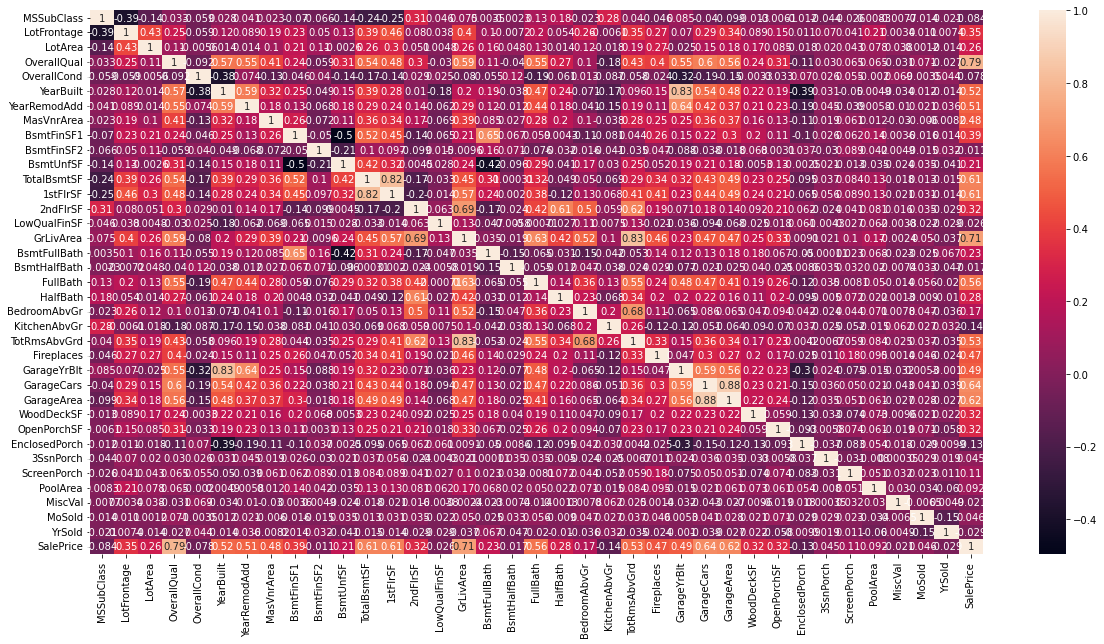

In [8]:
cor=train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

<AxesSubplot:ylabel='Id'>

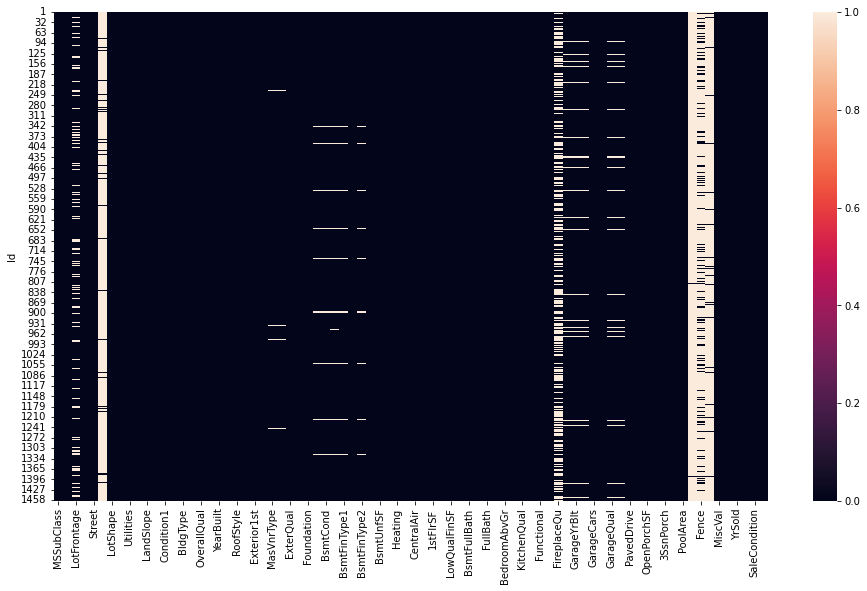

In [9]:
# Show the null values using heatmap

plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

In [10]:
#Percentages of null value

null_percent_train = train.isnull().sum()/train.shape[0]*100
null_percent_train

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [11]:
col_drop_train=null_percent_train[null_percent_train > 20].keys()

In [12]:
#drop columns with the null value > 20%

train=train.drop(col_drop_train,'columns')
train.shape

(1460, 75)

In [13]:
null_percent_test = test.isnull().sum()/test.shape[0]*100
null_percent_test

MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
T

In [14]:
col_drop_test=null_percent_test[null_percent_test > 20].keys()

In [15]:
test=test.drop(col_drop_test,'columns')
test.shape

(1459, 74)

# Missing Values

In [16]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [17]:
train.BsmtQual = train.BsmtQual.fillna("None")
train.BsmtCond = train.BsmtCond.fillna("None")
train.BsmtExposure = train.BsmtExposure.fillna("None")
train.BsmtFinType1 = train.BsmtFinType1.fillna("None")
train.BsmtFinType2 = train.BsmtFinType2.fillna("None")
train.GarageType = train.GarageType.fillna("None")
train.GarageFinish = train.GarageFinish.fillna("None")
train.GarageQual = train.GarageQual.fillna("None")
train.GarageCond = train.GarageCond.fillna("None")  

In [18]:
for i in train.columns:
    if(train[i].dtypes == "object"):
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        x = train[i].mean()
        train[i] = train[i].fillna(x)   

In [19]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [20]:
test.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

In [21]:
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")

In [22]:
for i in test.columns:
    if(test[i].dtypes == "object"):
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)
    else:
        x = test[i].mean()
        test[i] = test[i].fillna(x)   

In [23]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [24]:
from sklearn.preprocessing import LabelEncoder
cols = test.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

print('Shape all_data: {}'.format(test.shape))

Shape all_data: (1459, 74)


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int32  
 5   LotShape       1459 non-null   int32  
 6   LandContour    1459 non-null   int32  
 7   Utilities      1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  Condition2     1459 non-null   int32  
 13  BldgType       1459 non-null   int32  
 14  HouseStyle     1459 non-null   int32  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearR

# Z Score

In [26]:
cat = []
con = []
for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(train[con]),columns=con)

In [28]:
out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In [29]:
from numpy import unique
outliers = unique(out)

In [30]:
train = train.drop(index=outliers,axis=0)

In [31]:
train.shape

(1015, 75)

In [32]:
train.index = range(0,1015,1)

In [33]:
y_train=train['SalePrice']
train=train.drop(['SalePrice'],axis=1)

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = train.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1015, 74)


In [35]:
#scaling the dataset 


from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(train)
x_train=scaler.transform(train)

In [36]:
scaler=MinMaxScaler()
scaler.fit(test)
x_test=scaler.transform(test)

# Machine Learning Model Building

# Linear Regression

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.2,random_state=31)

In [38]:
li_model= LinearRegression()
li_model.fit(xtrain,ytrain)

LinearRegression()

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
ypredtrain=li_model.predict(xtrain)

MAE = mean_absolute_error(ytrain,ypredtrain)
print('mean_absolute_error:   ',MAE)

MSE = mean_squared_error(ytrain,ypredtrain)
print('mean_squared_error:   ',MSE)

r2 = r2_score(ytrain,ypredtrain)
print('r2_score:   ',r2)

mean_absolute_error:    17579.664113338124
mean_squared_error:    796233105.1964839
r2_score:    0.8843085438424029


In [41]:
ypredtest = li_model.predict(xtest)

MAE = mean_absolute_error(ytest,ypredtest)
print('mean_absolute_error:   ',MAE)

MSE = mean_squared_error(ytest,ypredtest)
print('mean_squared_error:   ',MSE)

r2 = r2_score(ytest,ypredtest)
print('r2_score:   ',r2)

mean_absolute_error:    19497.22020565385
mean_squared_error:    1717110976.6415553
r2_score:    0.6889802971496815


In [42]:
li_model.score(xtest,ytest)

0.6889802971496815

In [43]:
li_model.score(xtrain,ytrain)

0.8843085438424029

# Lasso model

In [44]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [45]:
# Training data evaluation
ypredtrain_lasso = lasso_model.predict(xtrain)

MSE = mean_squared_error(ytrain,ypredtrain_lasso)
print('mean_squared_error:   ',MSE)

r2 = r2_score(ytrain,ypredtrain_lasso)
print('r2_score:   ',r2)

mean_squared_error:    796195475.2029089
r2_score:    0.8843140114230944


In [46]:
# Testing data evaluation
ypredtest_lasso = lasso_model.predict(xtest)

MSE = mean_squared_error(ytest,ypredtest_lasso)
print('mean_squared_error:   ',MSE)

r2 = r2_score(ytest,ypredtest_lasso)
print('r2_score:   ',r2)

mean_squared_error:    1703308722.5146253
r2_score:    0.6914802945497437


In [47]:
lasso_model.score(xtrain,ytrain)

0.8843140114230944

In [48]:
lasso_model.score(xtest,ytest)

0.6914802945497437

# Ridge model

In [49]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

Ridge()

In [50]:
# Training data evaluation
ypredtrain_ridge = ridge_model.predict(xtrain)

MSE = mean_squared_error(ytrain,ypredtrain_ridge)
print('mean_squared_error:   ',MSE)

r2 = r2_score(ytrain,ypredtrain_ridge)
print('r2_score:   ',r2)

mean_squared_error:    849121807.1573491
r2_score:    0.8766238960876129


In [51]:
# Testing data evaluation
ypredtest_ridge = ridge_model.predict(xtest)

MSE = mean_squared_error(ytest,ypredtest_ridge)
print('mean_squared_error:   ',MSE)

r2 = r2_score(ytest,ypredtest_ridge)
print('r2_score:   ',r2)

mean_squared_error:    606613150.9556471
r2_score:    0.8901243748820871


In [52]:
ridge_model.score(xtest,ytest)

0.8901243748820871

In [53]:
ridge_model.score(xtrain,ytrain)

0.8766238960876129

In [54]:
y_predicted=ridge_model.predict(x_test)

In [55]:
y_predicted

array([ 75184.3731208 , 100354.69033064, 128728.31902598, ...,
       110121.01154911,  70588.79380046, 184119.38890962])

In [56]:
pred=pd.DataFrame(y_predicted)

submit_test=pd.concat([ID,pred],axis=1)
submit_test.columns=['Id','SalePrice']
submit_test.head()

,Id,SalePrice
0,1461,75184.373121
1,1462,100354.690331
2,1463,128728.319026
3,1464,138930.537119
4,1465,133923.205692


In [57]:
submit_test.to_csv('sample_submission_file.csv',index=False)